In [ ]:
import numpy as np
samp_v=np.loadtxt('samp_v_recycled_225.txt')

225000
1761.018745747706
0.9969879739626601


In [2]:
# --- 参数 ---
N_SAMP = 1000             # 每个源的样本数
V_MAX_CAP = 10000.0       # 速度上限 (km/s)

# 假设 samp_v 已经加载，我们获取总样本数
TOTAL_SAMPLES = len(samp_v)
N_STARS = int(TOTAL_SAMPLES / N_SAMP)
rng = np.random.default_rng(123456)

# 最终存储被接受的 V_3D 样本的数组
V_3D_accepted = np.zeros(TOTAL_SAMPLES)
k = 0 # V_3D_accepted 数组的计数器

print(f"--- 启动拒绝采样，目标 V_3D < {V_MAX_CAP:.0f} km/s ---")

# 外层循环：遍历每个源 (465 个)
for i in range(N_STARS):
    
    # 提取当前源的 1000 个固定的 v_trans 样本
    v_trans_samples = samp_v[i * N_SAMP : (i + 1) * N_SAMP]
    # 内层循环：遍历当前源的 1000 个固定 v_trans 样本
    for j in range(N_SAMP):
        v_trans_j = v_trans_samples[j] # 当前固定的 v_trans 值
        
        # 拒绝采样循环：持续生成角度，直到满足 V_MAX_CAP
        while True:
            # 1. 随机采样一个新的 cos(theta) (实现各向同性)
            cos_theta = rng.uniform(-1.0, 1.0)
            
            # 2. 计算 sin(theta)
            sin_theta = np.sqrt(1.0 - cos_theta**2)
            
            # 3. 计算试探 V_3D 值 (添加极小值保护，防止 sin_theta 严格为 0)
            sin_theta = np.maximum(sin_theta, 1e-10) 
            V_3D_trial = v_trans_j / sin_theta
            
            # 4. 验收条件
            if V_3D_trial < V_MAX_CAP:
                # 样本被接受，存储结果，并退出 while 循环
                V_3D_accepted[k] = V_3D_trial
                k += 1
                break
            # 否则 (V_3D_trial >= V_MAX_CAP)，继续 while 循环，重新采样 cos(theta)
    
    # 可选：打印进度
    if (i + 1) % 100 == 0:
        print(f"  已处理 {i + 1}/{N_STARS} 个源...")

print("\n拒绝采样完成。")
print(f"最终生成的 V_3D 最大值: {np.max(V_3D_accepted):.2f} km/s")

# 最终使用的数组是 V_3D_accepted

--- 启动拒绝采样，目标 V_3D < 10000 km/s ---
  已处理 100/225 个源...
  已处理 200/225 个源...

拒绝采样完成。
最终生成的 V_3D 最大值: 9973.38 km/s


(0.0, 1000.0)

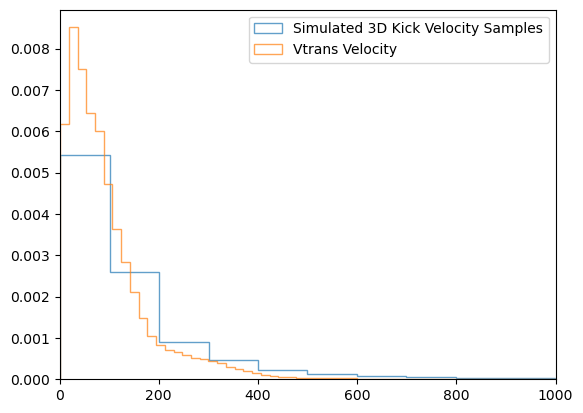

In [4]:
import matplotlib.pyplot as plt
plt.hist(V_3D_accepted,bins=100,density=True,alpha=0.7,histtype='step',label='Simulated 3D Kick Velocity Samples')
plt.hist(samp_v,bins=100,density=True,alpha=0.7,histtype='step',label='Vtrans Velocity')
plt.legend()
plt.xlim(0,1000)

In [ ]:
np.savetxt('samp_v_recycled_225_3D.txt',V_3D_accepted)


In [2]:
import numpy as np
samp_v_new=np.loadtxt('samp_v_recycled_225_3D.txt')

In [6]:
print(min(samp_v_new),max(samp_v_new))

1.117866654048897 9973.384228436606


In [3]:
import numpy as np
from scipy.special import erf
from scipy.stats import beta as beta_dist
from scipy.stats import truncnorm
from scipy.interpolate import interp1d
import bilby
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
from bilby.core.prior import Uniform
from bilby.core.sampler import run_sampler
from bilby.core.prior import LogUniform
from bilby.hyper.likelihood import HyperparameterLikelihood
from scipy import interpolate
from scipy import integrate
import random
import argparse
import os
import glob
import warnings
warnings.filterwarnings("ignore")
#####################
outdir='/home/lz/work/pulsar_kick_velocity/mnt/BuffaloB/lz/hy_outdir'
data_exp=samp_v_new
import sys
#import utilizes
npool=300
NN=int(len(data_exp)/1000)
nlive=800
mx=1000
#################################
data_df=list()
ns_m=abs(data_exp)
for i in range(NN):
    re=pd.DataFrame(ns_m[i*mx:(i+1)*mx],columns=['mu'])
    data_df.append(re)
samples = data_df

def run_prior(dataset):
    return 1/2600



16:25 bilby INFO    : Running for label 'u_hype_42343', output will be saved to '/home/lz/work/pulsar_kick_velocity/mnt/BuffaloB/lz/hy_outdir'
16:25 bilby INFO    : Analysis priors:
16:25 bilby INFO    : k=Uniform(minimum=1, maximum=5, name='k', latex_label='$k$', unit=None, boundary=None)
16:25 bilby INFO    : theta=Uniform(minimum=10, maximum=100, name='theta', latex_label='$\\theta$(km/s)', unit=None, boundary=None)
16:25 bilby INFO    : Analysis likelihood class: <class 'bilby.hyper.likelihood.HyperparameterLikelihood'>
16:25 bilby INFO    : Analysis likelihood noise evidence: 0
16:25 bilby INFO    : Single likelihood evaluation took 2.117e-03 s
16:25 bilby INFO    : Using sampler Dynesty with kwargs {'nlive': 800, 'bound': 'live', 'sample': 'act-walk', 'periodic': None, 'reflective': None, 'update_interval': 600, 'first_update': None, 'rstate': None, 'queue_size': 300, 'pool': None, 'use_pool': None, 'live_points': None, 'logl_args': None, 'logl_kwargs': None, 'ptform_args': None,

1it [00:00, ?it/s]

16:36 bilby INFO    : Written checkpoint file /home/lz/work/pulsar_kick_velocity/mnt/BuffaloB/lz/hy_outdir/u_hype_42343_resume.pickle
16:37 bilby INFO    : Starting to close worker pool.
16:37 bilby INFO    : Finished closing worker pool.


16:37 bilby INFO    : Rejection sampling nested samples to obtain 2143 posterior samples
16:37 bilby INFO    : Sampling time: 0:10:29.448274
16:37 bilby WARNING : Result.save_to_file called with extension=True. This will default to json, and ignore the extension from the filename. This behaviour is deprecated and will be removed. 
16:37 bilby WARNING : Result.save_to_file called with extension=True. This will default to json, and ignore the extension from the filename. This behaviour is deprecated and will be removed. 
16:37 bilby INFO    : Summary of results:
nsamples: 2143
ln_noise_evidence:  0.000
ln_evidence: 473.960 +/-  0.085
ln_bayes_factor: 473.960 +/-  0.085



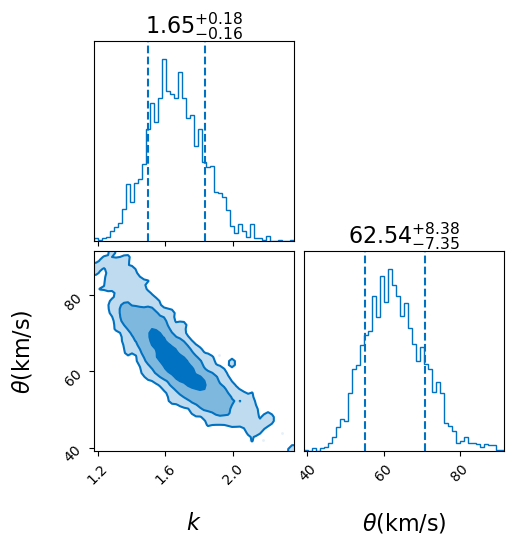

In [29]:
from scipy.special import beta
from scipy.special import gamma
def hyper_prior_gamma(dataset, k,theta):
    return (1 / (gamma(k)*theta**k)) * dataset['mu']**(k-1) *np.exp(-dataset['mu']/theta)

hp_priors_gamma = dict(k=Uniform(1,5, 'k',r'$k$'),
                theta=Uniform(10, 100, 'theta',r'$\theta$(km/s)') )

hyper_prior_gamma=hyper_prior_gamma

hp_likelihood_gamma = HyperparameterLikelihood(
    posteriors=samples, hyper_prior=hyper_prior_gamma,
    sampling_prior=run_prior, log_evidences=0, max_samples=mx)

hp_priors_gamma =hp_priors_gamma
# And run sampler
result_gamma = run_sampler(
    likelihood=hp_likelihood_gamma, priors=hp_priors_gamma, sampler='dynesty', nlive=nlive,
    use_ratio=False, outdir=outdir, label='u_hype_{}'.format(np.random.randint(1,88888)),
    verbose=True, clean=True,npool=npool)
result_gamma.plot_corner(title_fmt='.1f')

10:48 bilby INFO    : Running for label 'u_hype_50383', output will be saved to '/home/lz/work/pulsar_kick_velocity/mnt/BuffaloB/lz/hy_outdir'
10:48 bilby INFO    : Analysis priors:
10:48 bilby INFO    : mu=Uniform(minimum=1, maximum=100, name='s_mu', latex_label='$\\mu$', unit=None, boundary=None)
10:48 bilby INFO    : sigma=Uniform(minimum=10, maximum=200, name='s_sigma', latex_label='$\\sigma$', unit=None, boundary=None)
10:48 bilby INFO    : Analysis likelihood class: <class 'bilby.hyper.likelihood.HyperparameterLikelihood'>
10:48 bilby INFO    : Analysis likelihood noise evidence: 0
10:48 bilby INFO    : Single likelihood evaluation took 1.506e-03 s
10:48 bilby INFO    : Using sampler Dynesty with kwargs {'nlive': 800, 'bound': 'live', 'sample': 'act-walk', 'periodic': None, 'reflective': None, 'update_interval': 600, 'first_update': None, 'rstate': None, 'queue_size': 300, 'pool': None, 'use_pool': None, 'live_points': None, 'logl_args': None, 'logl_kwargs': None, 'ptform_args': 

1it [00:00, ?it/s]

10:49 bilby INFO    : Written checkpoint file /home/lz/work/pulsar_kick_velocity/mnt/BuffaloB/lz/hy_outdir/u_hype_50383_resume.pickle
10:49 bilby INFO    : Starting to close worker pool.
10:49 bilby INFO    : Finished closing worker pool.
10:49 bilby INFO    : Rejection sampling nested samples to obtain 2129 posterior samples
10:49 bilby INFO    : Sampling time: 0:00:26.753044
10:49 bilby WARNING : Result.save_to_file called with extension=True. This will default to json, and ignore the extension from the filename. This behaviour is deprecated and will be removed. 
10:49 bilby WARNING : Result.save_to_file called with extension=True. This will default to json, and ignore the extension from the filename. This behaviour is deprecated and will be removed. 


10:49 bilby INFO    : Summary of results:
nsamples: 2129
ln_noise_evidence:  0.000
ln_evidence: 467.723 +/-  0.075
ln_bayes_factor: 467.723 +/-  0.075



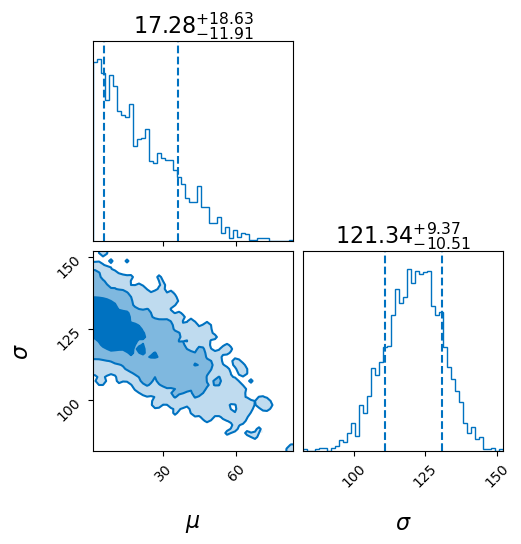

In [3]:
#begin Gaussian model with fixed upper and lower mass
def hyper_prior_G_fixed_max_min(dataset, mu, sigma):
    mup=10000
    mlo=1
    normalisingTerm = 0.5 * ( erf((mu-mlo)/(np.sqrt(2) * sigma)) -  erf((mu-mup)/(np.sqrt(2) * sigma)) )
    return ( ( dataset['mu'] >= mlo) & (dataset['mu'] <= mup))*((mu>mlo)&(mu<mup)) * (np.exp(- (dataset['mu'] - mu)**2 / (2 * sigma**2)) /\
        (2 * np.pi * sigma**2)**0.5) / normalisingTerm 
hp_priors_G_fixed_max_min= dict(mu=Uniform(1,100, 's_mu', '$\mu$'),
                 sigma=Uniform(10,200, 's_sigma', '$\sigma$'))
#end Gaussian with fixed upper and lower ma
#end Gaussian model 
hyper_prior_G=hyper_prior_G_fixed_max_min

hp_likelihood_G = HyperparameterLikelihood(
    posteriors=samples, hyper_prior=hyper_prior_G,
    sampling_prior=run_prior, log_evidences=0, max_samples=mx)

hp_priors_G =hp_priors_G_fixed_max_min

# And run sampler
result_G = run_sampler(
    likelihood=hp_likelihood_G, priors=hp_priors_G, sampler='dynesty', nlive=nlive,
    use_ratio=False, outdir=outdir, label='u_hype_{}'.format(np.random.randint(1,88888)),
    verbose=True, clean=True,npool=npool)
result_G.plot_corner()

<>:9: SyntaxWarning: invalid escape sequence '\m'
<>:10: SyntaxWarning: invalid escape sequence '\s'
<>:11: SyntaxWarning: invalid escape sequence '\m'
<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\m'
<>:10: SyntaxWarning: invalid escape sequence '\s'
<>:11: SyntaxWarning: invalid escape sequence '\m'
<>:12: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_3123504/925661624.py:9: SyntaxWarning: invalid escape sequence '\m'
  hp_priors_2G_fixed_max_min = dict(mu1=Uniform(1, 100, 'mu1', '$\mu_1$'),
/tmp/ipykernel_3123504/925661624.py:10: SyntaxWarning: invalid escape sequence '\s'
  sigma1=Uniform(1,400, 'sigma1', '$\sigma_1$'),
/tmp/ipykernel_3123504/925661624.py:11: SyntaxWarning: invalid escape sequence '\m'
  mu2=Uniform(1, 500, 'mu2', '$\mu_2$'),
/tmp/ipykernel_3123504/925661624.py:12: SyntaxWarning: invalid escape sequence '\s'
  sigma2=Uniform(1, 500, 'sigma2', '$\sigma_2$'),
11:40 bilby INFO    : Running for label 'u_h

1it [00:00, ?it/s]

11:51 bilby INFO    : Written checkpoint file /home/lz/work/pulsar_kick_velocity/mnt/BuffaloB/lz/hy_outdir/u_hype_84409_resume.pickle
12:02 bilby INFO    : Written checkpoint file /home/lz/work/pulsar_kick_velocity/mnt/BuffaloB/lz/hy_outdir/u_hype_84409_resume.pickle
12:15 bilby INFO    : Written checkpoint file /home/lz/work/pulsar_kick_velocity/mnt/BuffaloB/lz/hy_outdir/u_hype_84409_resume.pickle
12:16 bilby INFO    : Written checkpoint file /home/lz/work/pulsar_kick_velocity/mnt/BuffaloB/lz/hy_outdir/u_hype_84409_resume.pickle
12:16 bilby INFO    : Starting to close worker pool.
12:16 bilby INFO    : Finished closing worker pool.


12:16 bilby INFO    : Rejection sampling nested samples to obtain 3407 posterior samples
12:16 bilby INFO    : Sampling time: 0:35:29.166346
12:16 bilby WARNING : Result.save_to_file called with extension=True. This will default to json, and ignore the extension from the filename. This behaviour is deprecated and will be removed. 
12:16 bilby WARNING : Result.save_to_file called with extension=True. This will default to json, and ignore the extension from the filename. This behaviour is deprecated and will be removed. 
12:16 bilby INFO    : Summary of results:
nsamples: 3407
ln_noise_evidence:  0.000
ln_evidence: 470.741 +/-  0.107
ln_bayes_factor: 470.741 +/-  0.107



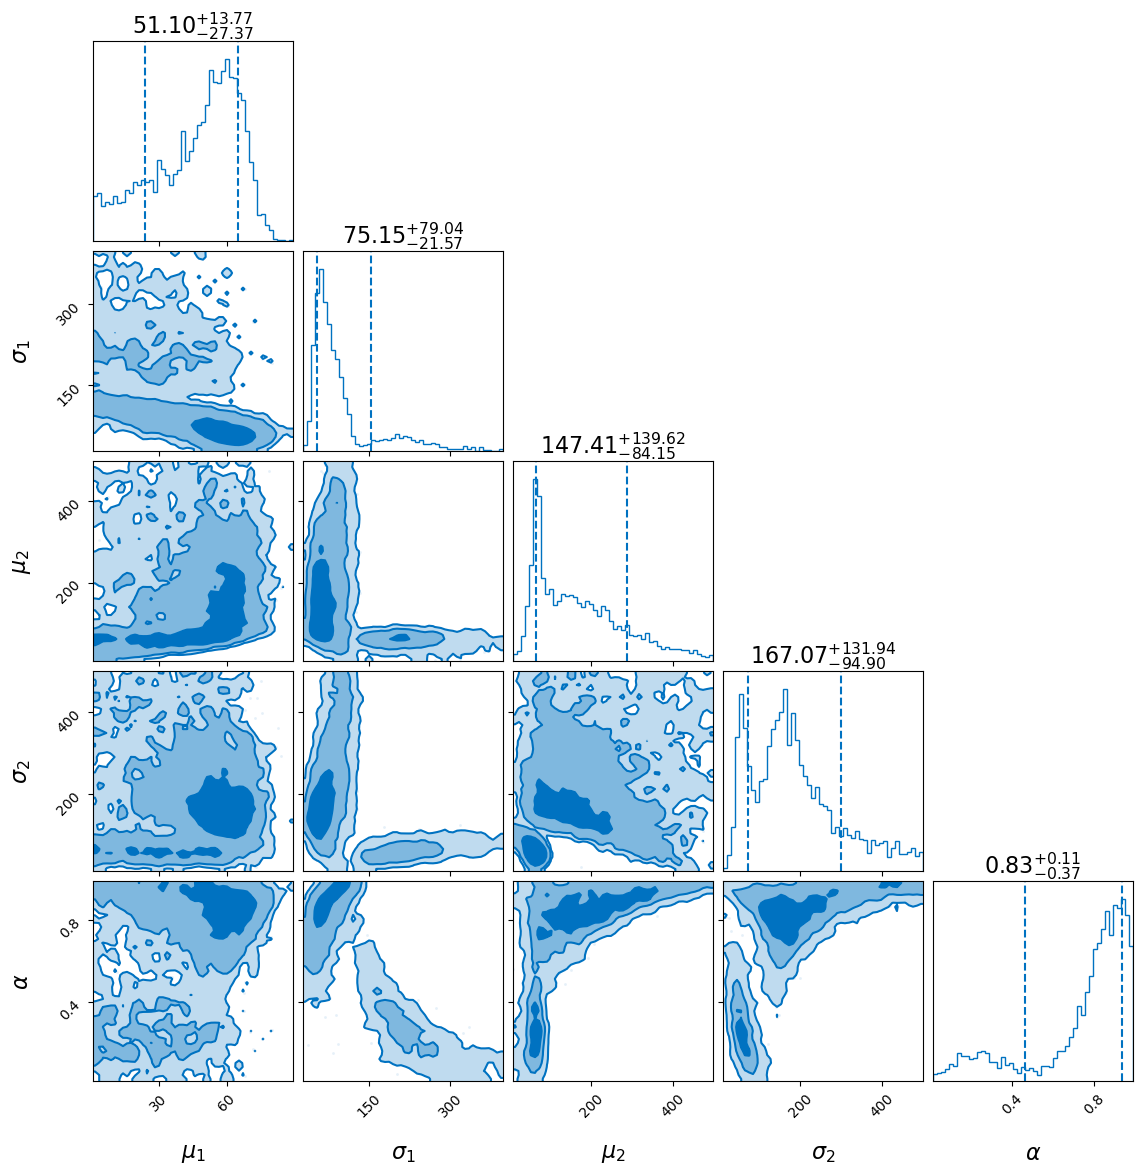

In [6]:
def hyper_prior_2G_fixed_max_min(dataset, mu1, sigma1,mu2,sigma2,alpha):
    mup=10000
    mlo=1
    normalisingTerm1 = 0.5 * ( erf((mu1-mlo)/(np.sqrt(2) * sigma1)) -  erf((mu1-mup)/(np.sqrt(2) * sigma1)) )
    normalisingTerm2 = 0.5 * ( erf((mu2-mlo)/(np.sqrt(2) * sigma2)) -  erf((mu2-mup)/(np.sqrt(2) * sigma2)) )
    return ((mu2 < mup ) & (mu1 > mlo) & (mu1 < mu2)  & ( dataset['mu'] >= mlo) & (dataset['mu'] <= mup)) *\
        ( (( alpha*(np.exp(- (dataset['mu'] - mu1)**2 / (2 * sigma1**2)) /(2 * np.pi * sigma1**2)**0.5)) /normalisingTerm1) +\
        (1-alpha)*( ((np.exp(- (dataset['mu'] - mu2)**2 / (2 * sigma2**2)) /(2 * np.pi * sigma2**2)**0.5) ) / normalisingTerm2) )
hp_priors_2G_fixed_max_min = dict(mu1=Uniform(1, 100, 'mu1', '$\mu_1$'),
                 sigma1=Uniform(1,400, 'sigma1', '$\sigma_1$'),
                mu2=Uniform(1, 500, 'mu2', '$\mu_2$'),
                sigma2=Uniform(1, 500, 'sigma2', '$\sigma_2$'),
                alpha=Uniform(0.01, 0.99, 'alpha', '$\\alpha$'))
#end two-Gausssian model with fixed lower and upper mass
hyper_prior_2G=hyper_prior_2G_fixed_max_min
hp_likelihood_2G = HyperparameterLikelihood(
    posteriors=samples, hyper_prior=hyper_prior_2G,
    sampling_prior=run_prior, log_evidences=0, max_samples=mx)

hp_priors_2G =hp_priors_2G_fixed_max_min

# And run sampler
result_2G = run_sampler(
    likelihood=hp_likelihood_2G, priors=hp_priors_2G, sampler='dynesty', nlive=nlive,
    use_ratio=False, outdir=outdir, label='u_hype_{}'.format(np.random.randint(1,88888)),
    verbose=True, clean=True,npool=npool)
result_2G.plot_corner()

<>:4: SyntaxWarning: invalid escape sequence '\m'
<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\m'
<>:5: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_2886698/406614344.py:4: SyntaxWarning: invalid escape sequence '\m'
  hp_priors_lognorm = dict(s_mu=Uniform(4, 5, 's_mu', '$\mu$'),
/tmp/ipykernel_2886698/406614344.py:5: SyntaxWarning: invalid escape sequence '\s'
  s_sigma=Uniform(0.5, 1.5, 's_sigma', '$\sigma$') )
16:17 bilby INFO    : Running for label 'u_hype_3228', output will be saved to '/home/lz/work/pulsar_kick_velocity/mnt/BuffaloB/lz/hy_outdir'
16:17 bilby INFO    : Analysis priors:
16:17 bilby INFO    : s_mu=Uniform(minimum=4, maximum=5, name='s_mu', latex_label='$\\mu$', unit=None, boundary=None)
16:17 bilby INFO    : s_sigma=Uniform(minimum=0.5, maximum=1.5, name='s_sigma', latex_label='$\\sigma$', unit=None, boundary=None)
16:17 bilby INFO    : Analysis likelihood class: <class 'bilby.hyper.likelihood.Hyperpa

1it [00:00, ?it/s]

16:23 bilby INFO    : Written checkpoint file /home/lz/work/pulsar_kick_velocity/mnt/BuffaloB/lz/hy_outdir/u_hype_3228_resume.pickle
16:23 bilby INFO    : Starting to close worker pool.
16:23 bilby INFO    : Finished closing worker pool.


16:23 bilby INFO    : Rejection sampling nested samples to obtain 2048 posterior samples
16:23 bilby INFO    : Sampling time: 0:05:10.744359
16:23 bilby WARNING : Result.save_to_file called with extension=True. This will default to json, and ignore the extension from the filename. This behaviour is deprecated and will be removed. 
16:23 bilby WARNING : Result.save_to_file called with extension=True. This will default to json, and ignore the extension from the filename. This behaviour is deprecated and will be removed. 
16:23 bilby INFO    : Summary of results:
nsamples: 2048
ln_noise_evidence:  0.000
ln_evidence: 474.585 +/-  0.079
ln_bayes_factor: 474.585 +/-  0.079



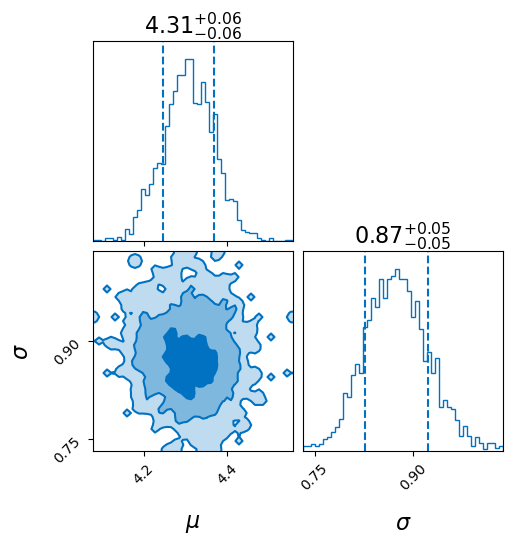

In [28]:
def hyper_prior_lognorm(dataset, s_mu, s_sigma):
    return np.exp(- (np.log(dataset['mu']) - s_mu)**2 / (2 * s_sigma**2)) /\
        (2 * np.pi * s_sigma**2)**0.5/(dataset['mu'])
hp_priors_lognorm = dict(s_mu=Uniform(4, 5, 's_mu', '$\mu$'),
                 s_sigma=Uniform(0.5, 1.5, 's_sigma', '$\sigma$') )

hyper_prior_lognorm=hyper_prior_lognorm

hp_likelihood_lognorm = HyperparameterLikelihood(
    posteriors=samples, hyper_prior=hyper_prior_lognorm,
    sampling_prior=run_prior, log_evidences=0, max_samples=mx)

hp_priors_lognorm =hp_priors_lognorm

# And run sampler
result_lognorm = run_sampler(
    likelihood=hp_likelihood_lognorm, priors=hp_priors_lognorm, sampler='dynesty', nlive=nlive,
    use_ratio=False, outdir=outdir, label='u_hype_{}'.format(np.random.randint(1,88888)),
    verbose=True, clean=True,npool=npool)
result_lognorm.plot_corner()

11:12 bilby INFO    : Running for label 'maxwell_hype_40666', output will be saved to '/home/lz/work/pulsar_kick_velocity/mnt/BuffaloB/lz/hy_outdir'
11:12 bilby INFO    : Analysis priors:
11:12 bilby INFO    : sigma=Uniform(minimum=10, maximum=100, name='sigma', latex_label='$\\sigma$', unit=None, boundary=None)
11:12 bilby INFO    : mlo=Uniform(minimum=1, maximum=40, name='mlo', latex_label='$\\rm{v^{lo}}$', unit=None, boundary=None)
11:12 bilby INFO    : mup=LogUniform(minimum=10, maximum=10000, name='mup', latex_label='$\\rm{v^{up}}$', unit=None, boundary=None)
11:12 bilby INFO    : Analysis likelihood class: <class 'bilby.hyper.likelihood.HyperparameterLikelihood'>
11:12 bilby INFO    : Analysis likelihood noise evidence: 0
11:12 bilby INFO    : Single likelihood evaluation took 1.572e-01 s
11:12 bilby INFO    : Using sampler Dynesty with kwargs {'nlive': 800, 'bound': 'live', 'sample': 'act-walk', 'periodic': None, 'reflective': None, 'update_interval': 600, 'first_update': None, 

1it [00:00, ?it/s]

11:20 bilby INFO    : Written checkpoint file /home/lz/work/pulsar_kick_velocity/mnt/BuffaloB/lz/hy_outdir/maxwell_hype_40666_resume.pickle
11:20 bilby INFO    : Starting to close worker pool.
11:20 bilby INFO    : Finished closing worker pool.
11:20 bilby INFO    : Rejection sampling nested samples to obtain 2067 posterior samples
11:20 bilby INFO    : Sampling time: 0:05:29.425813
11:20 bilby WARNING : Result.save_to_file called with extension=True. This will default to json, and ignore the extension from the filename. This behaviour is deprecated and will be removed. 
11:20 bilby WARNING : Result.save_to_file called with extension=True. This will default to json, and ignore the extension from the filename. This behaviour is deprecated and will be removed. 


11:20 bilby INFO    : Summary of results:
nsamples: 2067
ln_noise_evidence:  0.000
ln_evidence: 407.241 +/-  0.088
ln_bayes_factor: 407.241 +/-  0.088



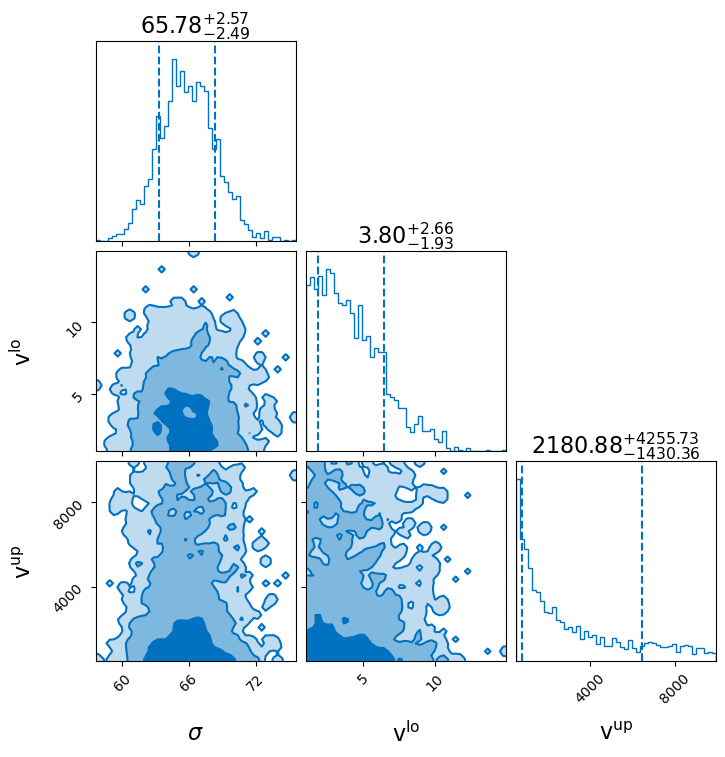

In [4]:
from scipy.stats import maxwell
from scipy.integrate import quad
def hyper_prior_maxwell(dataset,mlo,mup,sigma):
    log_likelihood = ((dataset['mu'] >= mlo) & (dataset['mu'] <= mup)) * maxwell.pdf(dataset['mu'],scale=sigma)
    return log_likelihood


hp_priors_maxwell = dict(sigma=Uniform(10, 100, 'sigma', r'$\sigma$'),
                        mlo=Uniform(1,40,'mlo', r'$\rm{v^{lo}}$'),
                        mup=LogUniform(10,10000,'mup', r'$\rm{v^{up}}$')
                        )

hyper_prior_maxwell = hyper_prior_maxwell

hp_likelihood_maxwell = HyperparameterLikelihood(
    posteriors=samples, hyper_prior=hyper_prior_maxwell,
    sampling_prior=run_prior, log_evidences=0, max_samples=mx)

hp_priors_maxwell = hp_priors_maxwell
result_maxwell = run_sampler(
    likelihood=hp_likelihood_maxwell, priors=hp_priors_maxwell, sampler='dynesty', nlive=nlive,
    use_ratio=False, outdir=outdir, label='maxwell_hype_{}'.format(np.random.randint(1, 88888)),
    verbose=True, clean=True, npool=npool)

result_maxwell.plot_corner()

11:21 bilby INFO    : Running for label 'double_maxwell_hype_6241', output will be saved to '/home/lz/work/pulsar_kick_velocity/mnt/BuffaloB/lz/hy_outdir'
11:21 bilby INFO    : Analysis priors:
11:21 bilby INFO    : sigma1=Uniform(minimum=1, maximum=60, name='sigma1', latex_label='$\\sigma_1$(km/s)', unit=None, boundary=None)
11:21 bilby INFO    : sigma2=Uniform(minimum=60, maximum=200, name='sigma2', latex_label='$\\sigma_2$(km/s)', unit=None, boundary=None)
11:21 bilby INFO    : alpha=Uniform(minimum=0.01, maximum=0.99, name='alpha', latex_label='$\\alpha$', unit=None, boundary=None)
11:21 bilby INFO    : Analysis likelihood class: <class 'bilby.hyper.likelihood.HyperparameterLikelihood'>
11:21 bilby INFO    : Analysis likelihood noise evidence: 0
11:21 bilby INFO    : Single likelihood evaluation took 7.713e-03 s
11:21 bilby INFO    : Using sampler Dynesty with kwargs {'nlive': 800, 'bound': 'live', 'sample': 'act-walk', 'periodic': None, 'reflective': None, 'update_interval': 600, 

1it [00:00, ?it/s]

11:28 bilby INFO    : Written checkpoint file /home/lz/work/pulsar_kick_velocity/mnt/BuffaloB/lz/hy_outdir/double_maxwell_hype_6241_resume.pickle
11:28 bilby INFO    : Starting to close worker pool.
11:28 bilby INFO    : Finished closing worker pool.


11:28 bilby INFO    : Rejection sampling nested samples to obtain 2419 posterior samples
11:28 bilby INFO    : Sampling time: 0:06:26.452822
11:28 bilby WARNING : Result.save_to_file called with extension=True. This will default to json, and ignore the extension from the filename. This behaviour is deprecated and will be removed. 
11:28 bilby WARNING : Result.save_to_file called with extension=True. This will default to json, and ignore the extension from the filename. This behaviour is deprecated and will be removed. 
11:28 bilby INFO    : Summary of results:
nsamples: 2419
ln_noise_evidence:  0.000
ln_evidence: 460.965 +/-  0.093
ln_bayes_factor: 460.965 +/-  0.093



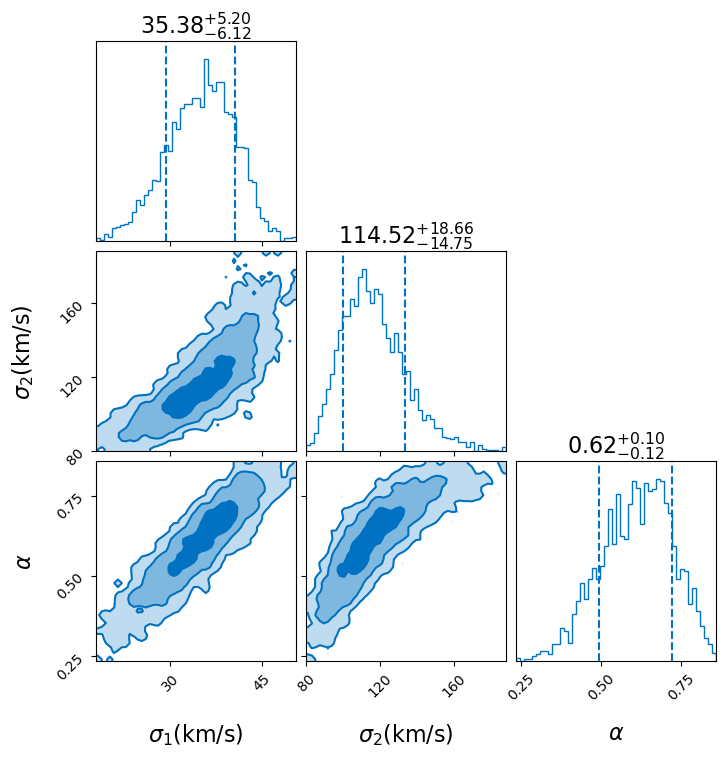

In [5]:
from scipy.stats import maxwell
from scipy.integrate import quad
def hyper_prior_double_maxwell(dataset,sigma1, sigma2, alpha):
    mup=10000
    mlo=1
    # 数据范围限制
    sigma_constraint = (mlo < sigma1) & (sigma1 < sigma2) & (sigma2 < mup)
    valid_range = (dataset['mu'] >= mlo) & (dataset['mu'] <= mup)
    
    # Maxwell PDF for the two components
    pdf1 = maxwell.pdf(dataset['mu'], scale=sigma1)
    pdf2 = maxwell.pdf(dataset['mu'], scale=sigma2)
    # Combined mixture PDF
    mixture_pdf = alpha * pdf1 + (1 - alpha) * pdf2
    # Apply range restriction
    log_likelihood = sigma_constraint*valid_range * mixture_pdf
    return log_likelihood
hp_priors_double_maxwell = dict(
    sigma1=Uniform(1, 60, 'sigma1', r'$\sigma_1$(km/s)'),
    sigma2=Uniform(60, 200, 'sigma2', r'$\sigma_2$(km/s)'),
    alpha=Uniform(0.01, 0.99, 'alpha', r'$\alpha$')
)

hyper_prior_double_maxwell = hyper_prior_double_maxwell

hp_likelihood_double_maxwell = HyperparameterLikelihood(
    posteriors=samples, hyper_prior=hyper_prior_double_maxwell,
    sampling_prior=run_prior, log_evidences=0, max_samples=mx)

hp_priors_double_maxwell = hp_priors_double_maxwell

# 运行采样器
result_2M = run_sampler(
    likelihood=hp_likelihood_double_maxwell, priors=hp_priors_double_maxwell, sampler='dynesty', nlive=nlive,
    use_ratio=False, outdir=outdir, label='double_maxwell_hype_{}'.format(np.random.randint(1, 88888)),
    verbose=True, clean=True, npool=npool)

# 绘制角图
result_2M.plot_corner()

17:24 bilby INFO    : Running for label 'u_hype_33409', output will be saved to '/home/lz/work/pulsar_kick_velocity/mnt/BuffaloB/lz/hy_outdir'
17:25 bilby INFO    : Analysis priors:
17:25 bilby INFO    : mu=Uniform(minimum=50, maximum=150, name='mlo', latex_label='$\\rm{\\mu}$', unit=None, boundary=None)
17:25 bilby INFO    : sigma=Uniform(minimum=50, maximum=150, name='sigma', latex_label='$\\rm{\\sigma}$', unit=None, boundary=None)
17:25 bilby INFO    : nu=LogUniform(minimum=0.01, maximum=300, name='nu', latex_label='$\\rm{\\nu}$', unit=None, boundary=None)
17:25 bilby INFO    : tau=Uniform(minimum=2.01, maximum=40, name='tau', latex_label='$\\rm{\\tau}$', unit=None, boundary=None)
17:25 bilby INFO    : Analysis likelihood class: <class 'bilby.hyper.likelihood.HyperparameterLikelihood'>
17:25 bilby INFO    : Analysis likelihood noise evidence: 0
17:25 bilby INFO    : Single likelihood evaluation took 1.666e-02 s
17:25 bilby INFO    : Using sampler Dynesty with kwargs {'nlive': 800, '

1it [00:00, ?it/s]

17:39 bilby INFO    : Written checkpoint file /home/lz/work/pulsar_kick_velocity/mnt/BuffaloB/lz/hy_outdir/u_hype_33409_resume.pickle
17:54 bilby INFO    : Written checkpoint file /home/lz/work/pulsar_kick_velocity/mnt/BuffaloB/lz/hy_outdir/u_hype_33409_resume.pickle
18:05 bilby INFO    : Written checkpoint file /home/lz/work/pulsar_kick_velocity/mnt/BuffaloB/lz/hy_outdir/u_hype_33409_resume.pickle
18:16 bilby INFO    : Written checkpoint file /home/lz/work/pulsar_kick_velocity/mnt/BuffaloB/lz/hy_outdir/u_hype_33409_resume.pickle
18:47 bilby INFO    : Written checkpoint file /home/lz/work/pulsar_kick_velocity/mnt/BuffaloB/lz/hy_outdir/u_hype_33409_resume.pickle
18:57 bilby INFO    : Written checkpoint file /home/lz/work/pulsar_kick_velocity/mnt/BuffaloB/lz/hy_outdir/u_hype_33409_resume.pickle
19:03 bilby INFO    : Written checkpoint file /home/lz/work/pulsar_kick_velocity/mnt/BuffaloB/lz/hy_outdir/u_hype_33409_resume.pickle
19:03 bilby INFO    : Starting to close worker pool.
19:03 bil

19:03 bilby INFO    : Rejection sampling nested samples to obtain 3090 posterior samples
19:03 bilby INFO    : Sampling time: 1:36:54.966091
19:03 bilby WARNING : Result.save_to_file called with extension=True. This will default to json, and ignore the extension from the filename. This behaviour is deprecated and will be removed. 
19:03 bilby WARNING : Result.save_to_file called with extension=True. This will default to json, and ignore the extension from the filename. This behaviour is deprecated and will be removed. 
19:03 bilby INFO    : Summary of results:
nsamples: 3090
ln_noise_evidence:  0.000
ln_evidence: 472.572 +/-  0.112
ln_bayes_factor: 472.572 +/-  0.112



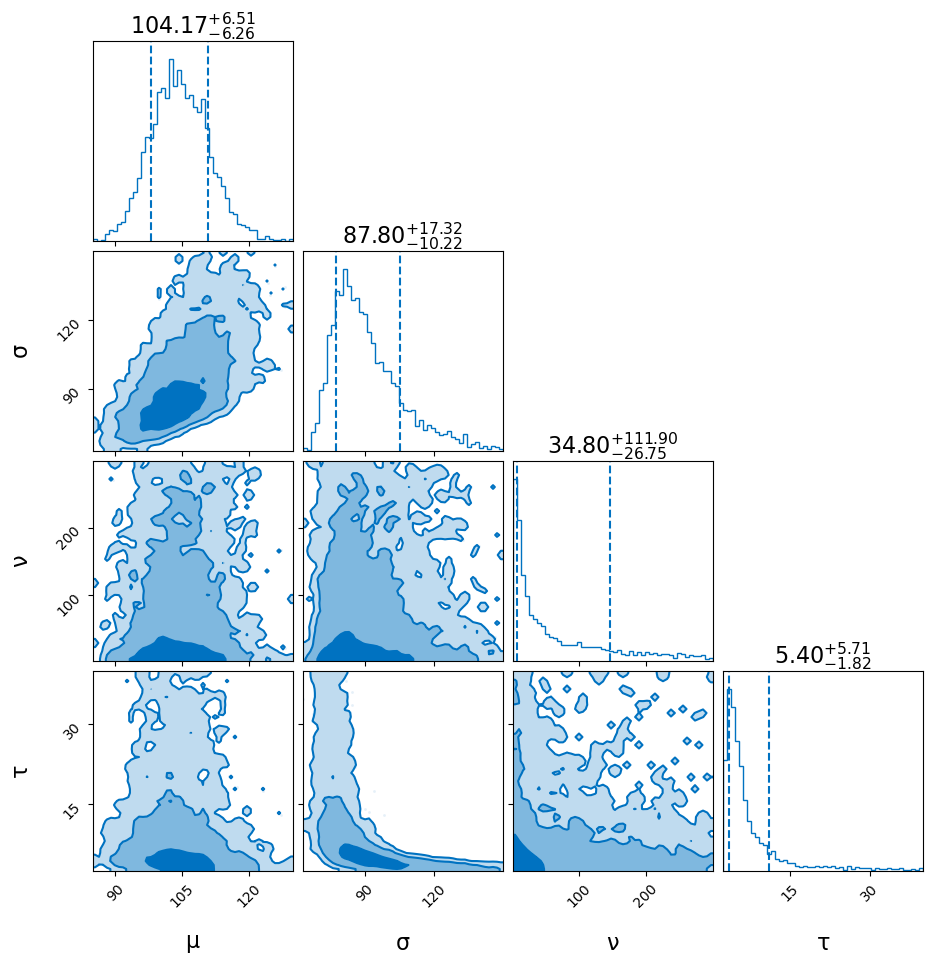

In [23]:
#begin SST
from scipy.special import beta
def hyper_prior_sst(dataset, mu,sigma,nu,tau):
        c = 2 * nu * ((1 + nu ** 2) *
                                beta(0.5, tau / 2) *
                                tau ** 0.5) ** -1
        m = ((2 * tau ** 0.5) * (nu - nu ** -1)) / (
                (tau - 1) * beta(0.5, 0.5 * tau))
        s2 = ((tau / (tau - 2)) * (
                nu ** 2 + nu ** -2 - 1) - m ** 2)
        mu_0 = mu - (sigma * m / np.sqrt(s2))
        sigma_0 = sigma / np.sqrt(s2)
        z = (dataset['mu'] - mu_0) / sigma_0
        p = np.where(dataset['mu'] < mu_0,
                     (c / sigma_0) * (1 + ((nu ** 2) * (z ** 2)) / tau) ** (
                             -(tau + 1) / 2),
                     (c / sigma_0) * (1 + (z ** 2) / ((nu ** 2) * tau)) ** (
                             -(tau + 1) / 2))
        return p

hp_priors_sst = dict(mu=Uniform(50, 150, 'mlo',r'$\rm{\mu}$'),
                sigma=Uniform(50, 150, 'sigma',r'$\rm{\sigma}$'),
                nu=LogUniform(0.01,300,'nu',r'$\rm{\nu}$'),
                tau=Uniform(2.01,40,'tau',r'$\rm{\tau}$') )
#end SST
hyper_prior_sst=hyper_prior_sst
hp_likelihood_sst = HyperparameterLikelihood(
    posteriors=samples, hyper_prior=hyper_prior_sst,
    sampling_prior=run_prior, log_evidences=0, max_samples=mx)

hp_priors_sst =hp_priors_sst

# And run sampler
result_sst = run_sampler(
    likelihood=hp_likelihood_sst, priors=hp_priors_sst, sampler='dynesty', nlive=nlive,
    use_ratio=False, outdir=outdir, label='u_hype_{}'.format(np.random.randint(1,88888)),
    verbose=True, clean=True,npool=npool)
result_sst.plot_corner()

14:49 bilby INFO    : Running for label 'u_hype_16482', output will be saved to '/home/lz/work/pulsar_kick_velocity/mnt/BuffaloB/lz/hy_outdir'
14:49 bilby INFO    : Analysis priors:
14:49 bilby INFO    : mlo=Uniform(minimum=1, maximum=50, name='mlo', latex_label='$\\rm{v^l}$', unit=None, boundary=None)
14:49 bilby INFO    : mup=Uniform(minimum=50, maximum=10000, name='mup', latex_label='$\\rm{v^u}$', unit=None, boundary=None)
14:49 bilby INFO    : Analysis likelihood class: <class 'bilby.hyper.likelihood.HyperparameterLikelihood'>
14:49 bilby INFO    : Analysis likelihood noise evidence: 0
/home/lz/miniconda3/envs/lz/lib/python3.13/site-packages/bilby/hyper/likelihood.py:64: RuntimeWarning: divide by zero encountered in log
  log_l = np.sum(np.log(np.sum(self.hyper_prior.prob(self.data, **parameters) /
14:49 bilby INFO    : Single likelihood evaluation took 9.272e-04 s
14:49 bilby INFO    : Using sampler Dynesty with kwargs {'nlive': 800, 'bound': 'live', 'sample': 'act-walk', 'periodi

1it [00:00, ?it/s]

14:55 bilby INFO    : Written checkpoint file /home/lz/work/pulsar_kick_velocity/mnt/BuffaloB/lz/hy_outdir/u_hype_16482_resume.pickle
14:55 bilby INFO    : Starting to close worker pool.
14:55 bilby INFO    : Finished closing worker pool.


14:55 bilby INFO    : Rejection sampling nested samples to obtain 2301 posterior samples
14:55 bilby INFO    : Sampling time: 0:05:15.527361
14:55 bilby WARNING : Result.save_to_file called with extension=True. This will default to json, and ignore the extension from the filename. This behaviour is deprecated and will be removed. 
14:55 bilby WARNING : Result.save_to_file called with extension=True. This will default to json, and ignore the extension from the filename. This behaviour is deprecated and will be removed. 
14:55 bilby INFO    : Summary of results:
nsamples: 2301
ln_noise_evidence:  0.000
ln_evidence: 449.089 +/-  0.122
ln_bayes_factor: 449.089 +/-  0.122



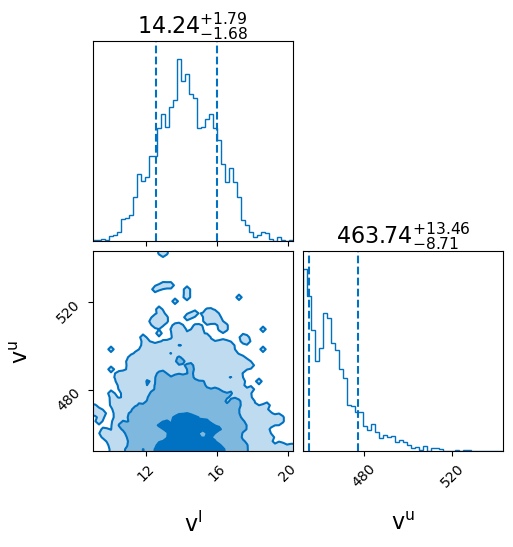

In [25]:
def hyper_prior_logu(dataset,mlo,mup):
    return (( dataset['mu'] >= mlo) & (dataset['mu'] <= mup))/( dataset['mu'] * np.log(mup / mlo) )

hp_priors_logu = dict(mlo=Uniform(1, 50, 'mlo',r'$\rm{v^l}$'),
                mup=Uniform(50, 10000, 'mup',r'$\rm{v^u}$'))
#end log-uniform
hyper_prior_logu=hyper_prior_logu

hp_likelihood_logu = HyperparameterLikelihood(
    posteriors=samples, hyper_prior=hyper_prior_logu,
    sampling_prior=run_prior, log_evidences=0, max_samples=mx)

hp_priors_logu =hp_priors_logu

# And run sampler
result_logu = run_sampler(
    likelihood=hp_likelihood_logu, priors=hp_priors_logu, sampler='dynesty', nlive=nlive,
    use_ratio=False, outdir=outdir, label='u_hype_{}'.format(np.random.randint(1,88888)),
    verbose=True, clean=True,npool=npool)
result_logu.plot_corner()

17:12 bilby INFO    : Running for label 'exponential_hype_68153', output will be saved to '/home/lz/work/pulsar_kick_velocity/mnt/BuffaloB/lz/hy_outdir'
17:12 bilby INFO    : Analysis priors:
17:12 bilby INFO    : lam=LogUniform(minimum=0.001, maximum=0.1, name='lam', latex_label='$\\lambda$', unit=None, boundary=None)
17:12 bilby INFO    : mlo=Uniform(minimum=1, maximum=10, name='mlo', latex_label='$\\rm{v^l}$', unit=None, boundary=None)
17:12 bilby INFO    : mup=LogUniform(minimum=10, maximum=10000, name='mup', latex_label='$\\rm{v^u}$', unit=None, boundary=None)
17:12 bilby INFO    : Analysis likelihood class: <class 'bilby.hyper.likelihood.HyperparameterLikelihood'>
17:12 bilby INFO    : Analysis likelihood noise evidence: 0
/home/lz/miniconda3/envs/lz/lib/python3.13/site-packages/bilby/hyper/likelihood.py:64: RuntimeWarning: divide by zero encountered in log
  log_l = np.sum(np.log(np.sum(self.hyper_prior.prob(self.data, **parameters) /
17:12 bilby INFO    : Single likelihood eval

1it [00:00, ?it/s]

17:21 bilby INFO    : Written checkpoint file /home/lz/work/pulsar_kick_velocity/mnt/BuffaloB/lz/hy_outdir/exponential_hype_68153_resume.pickle
17:22 bilby INFO    : Starting to close worker pool.
17:22 bilby INFO    : Finished closing worker pool.


17:22 bilby INFO    : Rejection sampling nested samples to obtain 2142 posterior samples
17:22 bilby INFO    : Sampling time: 0:09:29.154994
17:22 bilby WARNING : Result.save_to_file called with extension=True. This will default to json, and ignore the extension from the filename. This behaviour is deprecated and will be removed. 
17:22 bilby WARNING : Result.save_to_file called with extension=True. This will default to json, and ignore the extension from the filename. This behaviour is deprecated and will be removed. 
17:22 bilby INFO    : Summary of results:
nsamples: 2142
ln_noise_evidence:  0.000
ln_evidence: 461.679 +/-  0.086
ln_bayes_factor: 461.679 +/-  0.086



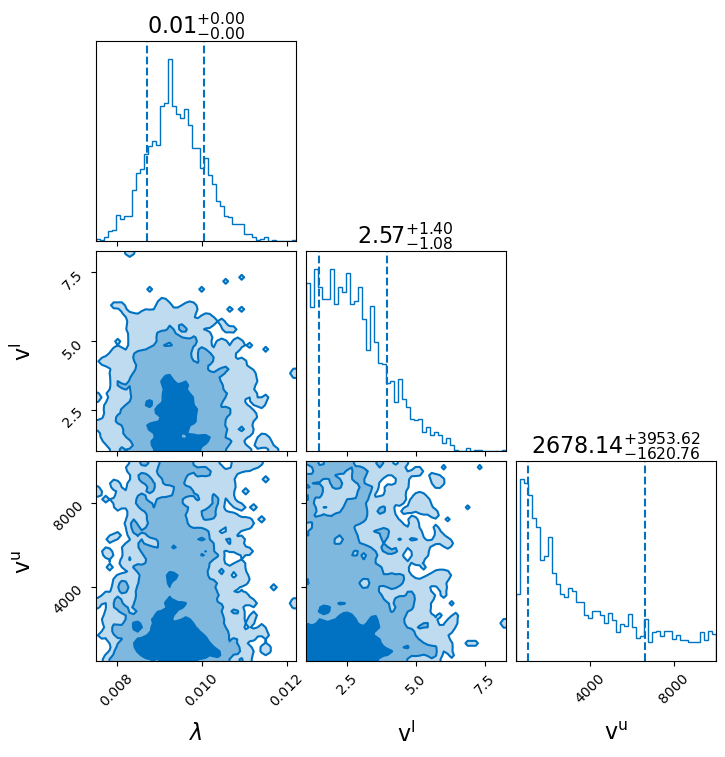

In [20]:
from scipy.stats import expon

def hyper_prior_exponential(dataset, mup, mlo, lam):
    valid_range = (dataset['mu'] >= mlo) & (dataset['mu'] <= mup)
    # Exponential PDF
    pdf_values = expon.pdf(dataset['mu'], scale=1/lam)
    # 限制范围外的概率为 0
    log_likelihood = valid_range * pdf_values
    return log_likelihood

hp_priors_exponential = dict(
    lam=LogUniform(0.001, 0.1, 'lam', r'$\lambda$'),  # 速率参数范围
    mlo=Uniform(1, 10, 'mlo', r'$\rm{v^l}$'),  # 下限范围
    mup=LogUniform(10, 10000, 'mup', r'$\rm{v^u}$')    # 上限范围
)

hyper_prior_exponential = hyper_prior_exponential

hp_likelihood_exponential = HyperparameterLikelihood(
    posteriors=samples, hyper_prior=hyper_prior_exponential,
    sampling_prior=run_prior, log_evidences=0, max_samples=mx)

hp_priors_exponential = hp_priors_exponential

# 运行采样器
result_exponential = run_sampler(
    likelihood=hp_likelihood_exponential, priors=hp_priors_exponential, sampler='dynesty', nlive=nlive,
    use_ratio=False, outdir=outdir, label='exponential_hype_{}'.format(np.random.randint(1, 88888)),
    verbose=True, clean=True, npool=npool)

# 绘制角图
result_exponential.plot_corner()

In [21]:
import bilby
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
file_exponential='/home/lz/work/pulsar_kick_velocity/mnt/BuffaloB/lz/hy_outdir/exponential_hype_68153_result.json'
result_exponential = bilby.result.read_in_result(file_exponential)
posterior_exponential=result_exponential.posterior
print(posterior_exponential)

           lam       mlo          mup  log_likelihood  log_prior
0     0.008296  8.267117  2290.841242      457.278425  -8.601726
1     0.010937  7.382050  9668.830580      458.240971 -10.318099
2     0.012209  3.807234  3297.710051      458.514783  -9.352461
3     0.010558  7.105264  1353.989700      459.766463  -8.317022
4     0.007971  6.361189  2315.357090      460.196216  -8.572454
...        ...       ...          ...             ...        ...
2137  0.009385  1.359499  1932.144856      466.144158  -8.554757
2138  0.009398  1.302048  5125.194092      466.144898  -9.531688
2139  0.009402  1.052075  7665.789043      466.145760  -9.934740
2140  0.009369  1.075371  7792.554723      466.146107  -9.947610
2141  0.009379  1.102248  5830.152705      466.146254  -9.658614

[2142 rows x 5 columns]


1σ 中心区间: (0.0087, 0.01006)
0.009344681022708669


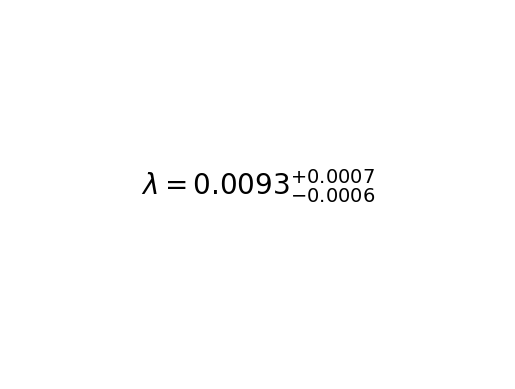

In [22]:

# 计算中心区间
center_interval = np.percentile(posterior_exponential['lam'], [16, 84])
print(f"1σ 中心区间: ({center_interval[0]:.4f}, {center_interval[1]:.4})")
median_lam=np.median(posterior_exponential['lam'])
print(median_lam)
alpha = center_interval[1] - median_lam
beta = median_lam - center_interval[0]

latex_str = f"$\\lambda = {median_lam:.4f} ^{{+{alpha:.4f}}} _{{-{beta:.4f}}}$"
# 显示LaTeX公式
plt.text(0.5, 0.5, latex_str, fontsize=20, ha='center')
plt.axis('off')  # 关闭坐标轴
plt.show()